### Data Loading, getting cuda

In [1]:
from data_loader import get_train_valid_loader
import torch
batch_size = 64
data_path = './data/train_labeled'

train_loader, valid_loader, test_loader, classes = get_train_valid_loader(data_path, batch_size)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Net initialization

In [2]:
from nets.vgg_sm import VggSm

net = VggSm()
net.to(device)

VggSm(
  (cnn): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout2d(p=0.2, inplace=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout2d(p=0.2, inplace=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU()
    (18): LPPool2d(norm_type=2, kernel_size=2, stride=2, ceil_mode=False)

### Init net weights from file (optional)

In [8]:
net_state_path = ''
net.load_state_dict(torch.load(net_state_path))

FileNotFoundError: [Errno 2] No such file or directory: './vgg-sm-drop.pth'

### Set seed (optional)

In [3]:
import torch
seed = 0
torch.manual_seed(seed)

### Start training if you didn't load net state from file

In [3]:
from train import train
import torch 
print(f'Seed: {torch.initial_seed()}')

lr = 0.007
momentum = 0.9
num_epochs = 100
calc_train_acc = True
accs_valid, losses, accs_train = train(net, train_loader, valid_loader, num_epochs, lr, 
                                       momentum, device, calc_train_acc)
print('Finished Training')

Seed: 312819457355500
epoch 1, valid  accuracy 9.44, train accuracy 9.977142857142857, loss 2.3032145731191966
epoch 2, valid  accuracy 9.093333333333334, train accuracy 9.274285714285714, loss 2.3028882870508505
epoch 3, valid  accuracy 25.866666666666667, train accuracy 23.345714285714287, loss 2.2033238179940846
epoch 4, valid  accuracy 27.826666666666668, train accuracy 25.951428571428572, loss 1.9710910004279296
epoch 5, valid  accuracy 33.906666666666666, train accuracy 31.197142857142858, loss 1.90612023774623
epoch 6, valid  accuracy 39.626666666666665, train accuracy 35.66285714285714, loss 1.8156406944804915
epoch 7, valid  accuracy 43.14666666666667, train accuracy 39.18857142857143, loss 1.7404300490942473
epoch 8, valid  accuracy 46.38666666666666, train accuracy 42.70285714285714, loss 1.6760789988463713
epoch 9, valid  accuracy 47.81333333333333, train accuracy 45.002857142857145, loss 1.6238320839252507
epoch 10, valid  accuracy 51.626666666666665, train accuracy 47.362

KeyboardInterrupt: 

### Save net weights to file (optional)

In [9]:
save_path = './vgg-sm-drop-30.pth'
torch.save(net.state_dict(), save_path)

### Evaluate net on test set 

In [4]:
net.eval()
from results import get_accuracy, get_accuracy_classes
print(f'accuracy on test set: {get_accuracy(net, test_loader, device)}')

classes_accuracy = get_accuracy_classes(net, test_loader, len(classes), device, batch_size)

for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], classes_accuracy[i]))

accuracy on test set: 82.62666666666667
Accuracy of airplane : 84 %
Accuracy of automobile : 93 %
Accuracy of  bird : 79 %
Accuracy of   cat : 64 %
Accuracy of  deer : 80 %
Accuracy of   dog : 68 %
Accuracy of  frog : 86 %
Accuracy of horse : 85 %
Accuracy of  ship : 91 %
Accuracy of truck : 92 %


### Plot accuracies

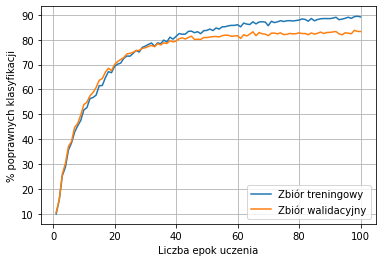

In [5]:
from graph_creator import draw_accuracy_train_valid
draw_accuracy_train_valid(accs_valid, accs_train)


### Plot loss

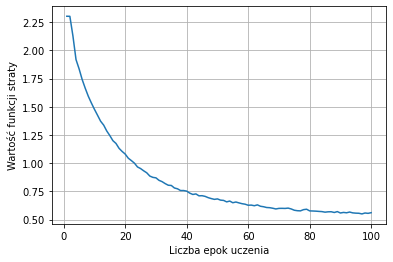

In [6]:
from graph_creator import draw_loss
draw_loss(losses)

### Plot classes accuracies

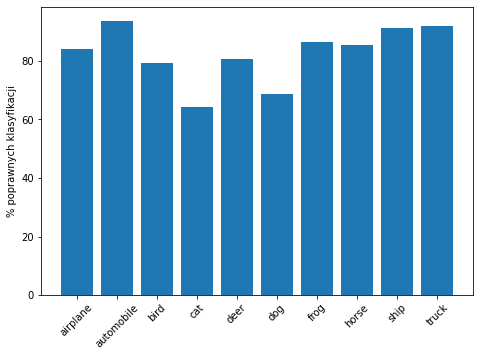

In [7]:
from graph_creator import draw_accuracies_classes
draw_accuracies_classes(classes, classes_accuracy)